## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from scipy.cluster import hierarchy as sch
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

In [37]:
crime_data = pd.read_csv("D:\\ExcelR\\Assingments\\Clustring\\crime_data.csv")

In [38]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [39]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [40]:
crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [41]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [42]:
crime_data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [43]:
crime_data.rename(columns={'Unnamed: 0': 'Country'},inplace=True)

In [44]:
crime_data.head()

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [45]:
crime_data["Country"].nunique()

50

#data visualisation
#scatterplot

<Axes: xlabel='Murder', ylabel='Count'>

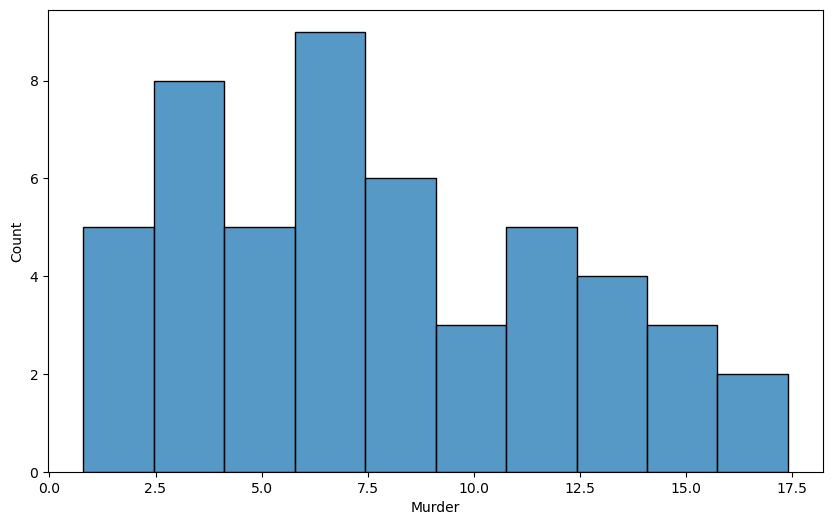

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(crime_data["Murder"],bins=10)

<Axes: xlabel='Assault', ylabel='Count'>

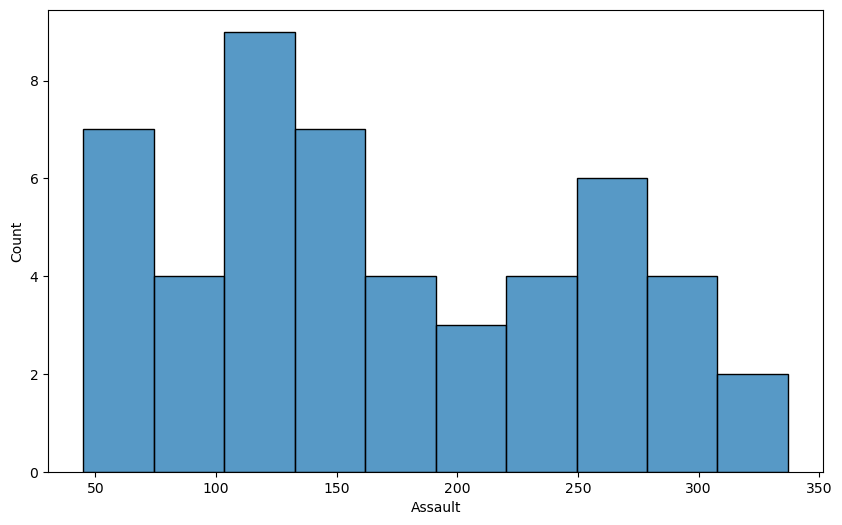

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(crime_data["Assault"],bins=10)

<Axes: xlabel='Rape', ylabel='Count'>

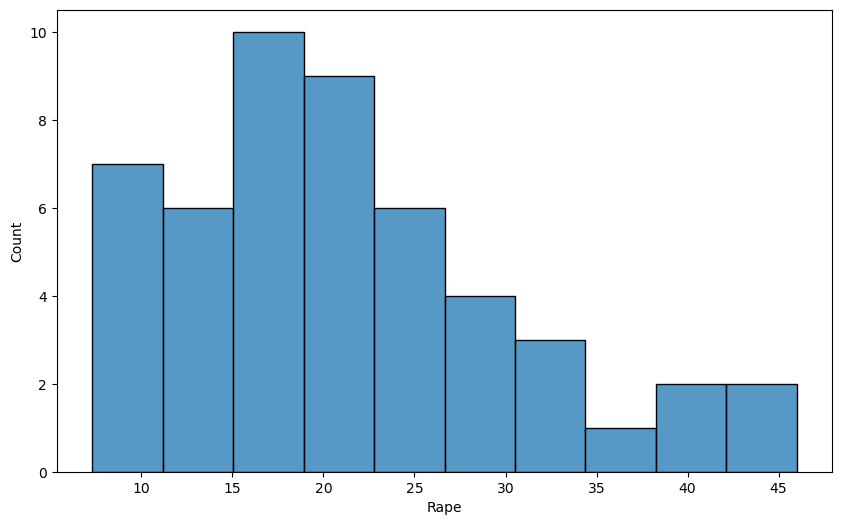

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(crime_data["Rape"],bins=10)

In [55]:
crime_data_df=crime_data.copy()

In [56]:
crime_data_df.drop(columns="Country",axis=1,inplace=True)

In [57]:
crime_data_df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [58]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaled_data=std.fit_transform(crime_data_df)
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [59]:
scaled_df=pd.DataFrame(scaled_data)

In [60]:
scaled_df

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [62]:
scaled_df.columns=crime_data_df.columns

In [63]:
scaled_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


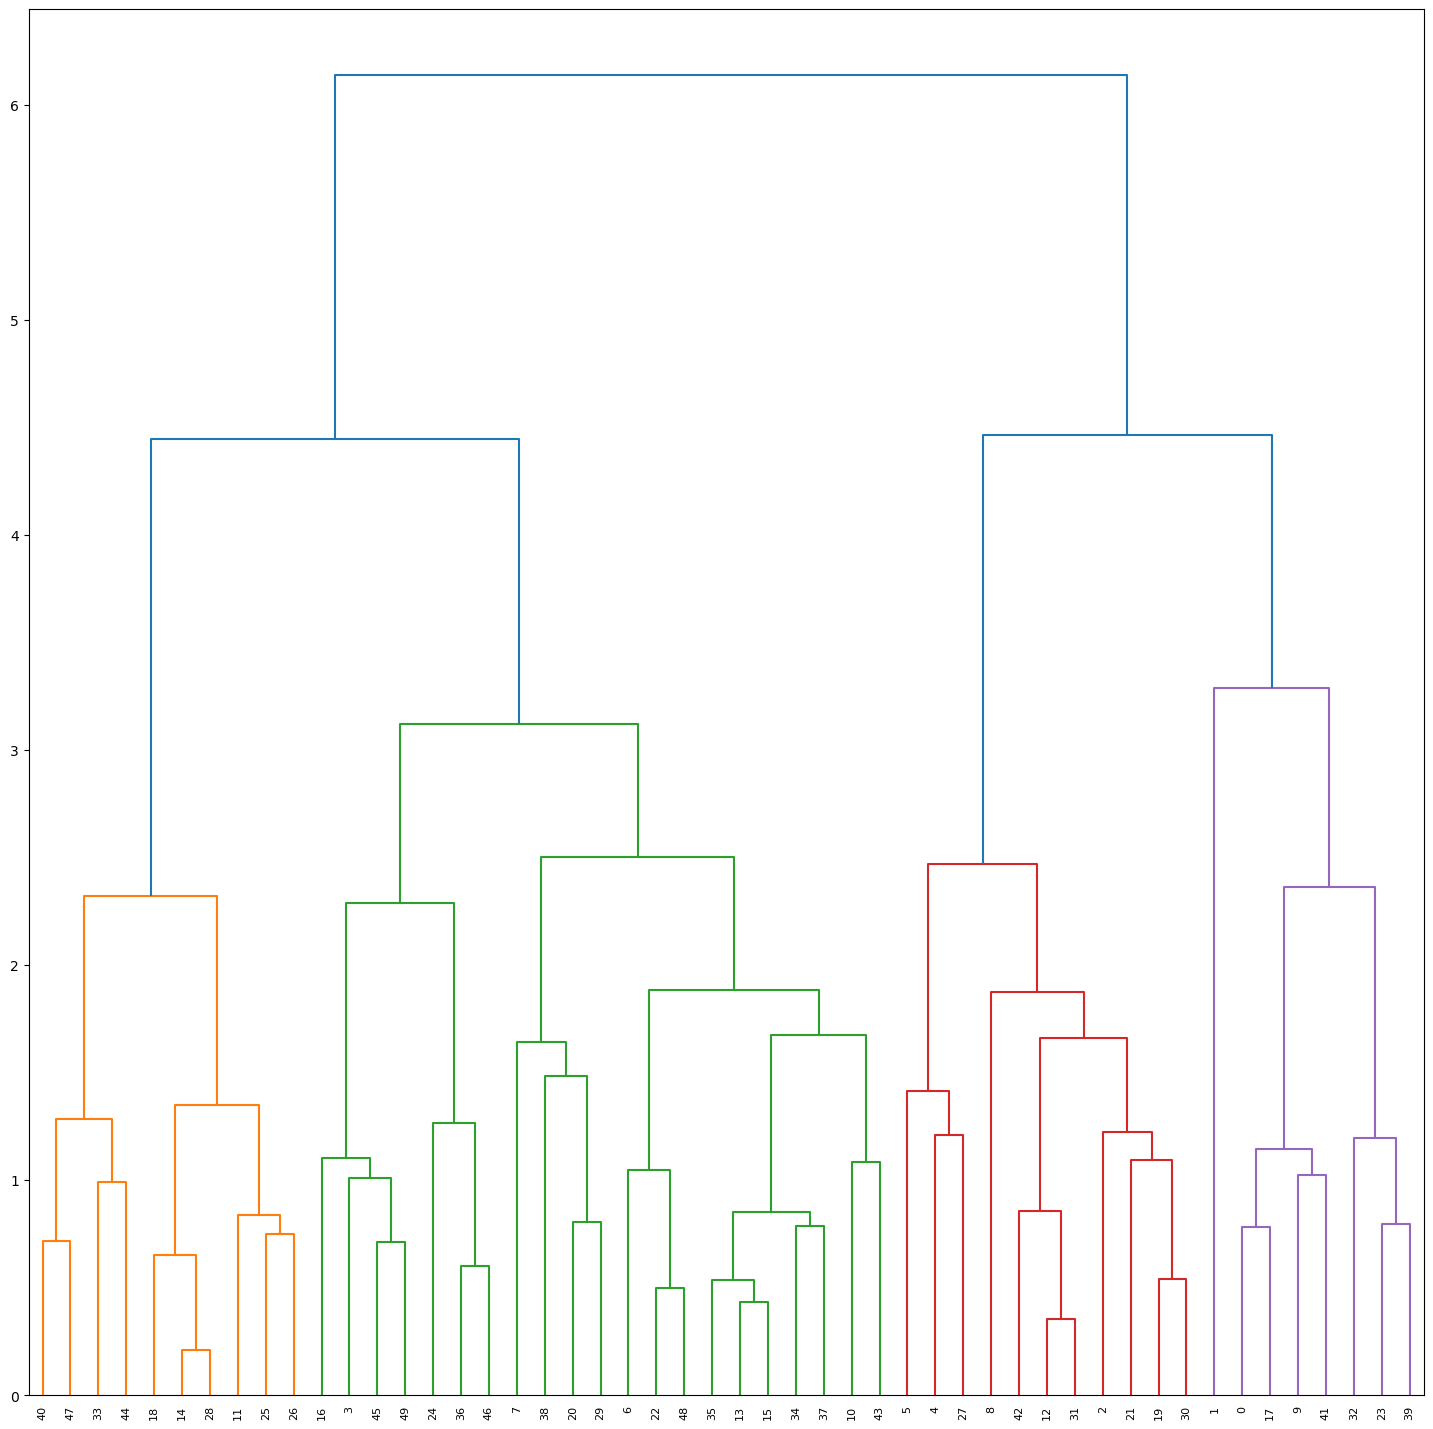

In [64]:
plt.figure(figsize=(18,18))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='complete'))

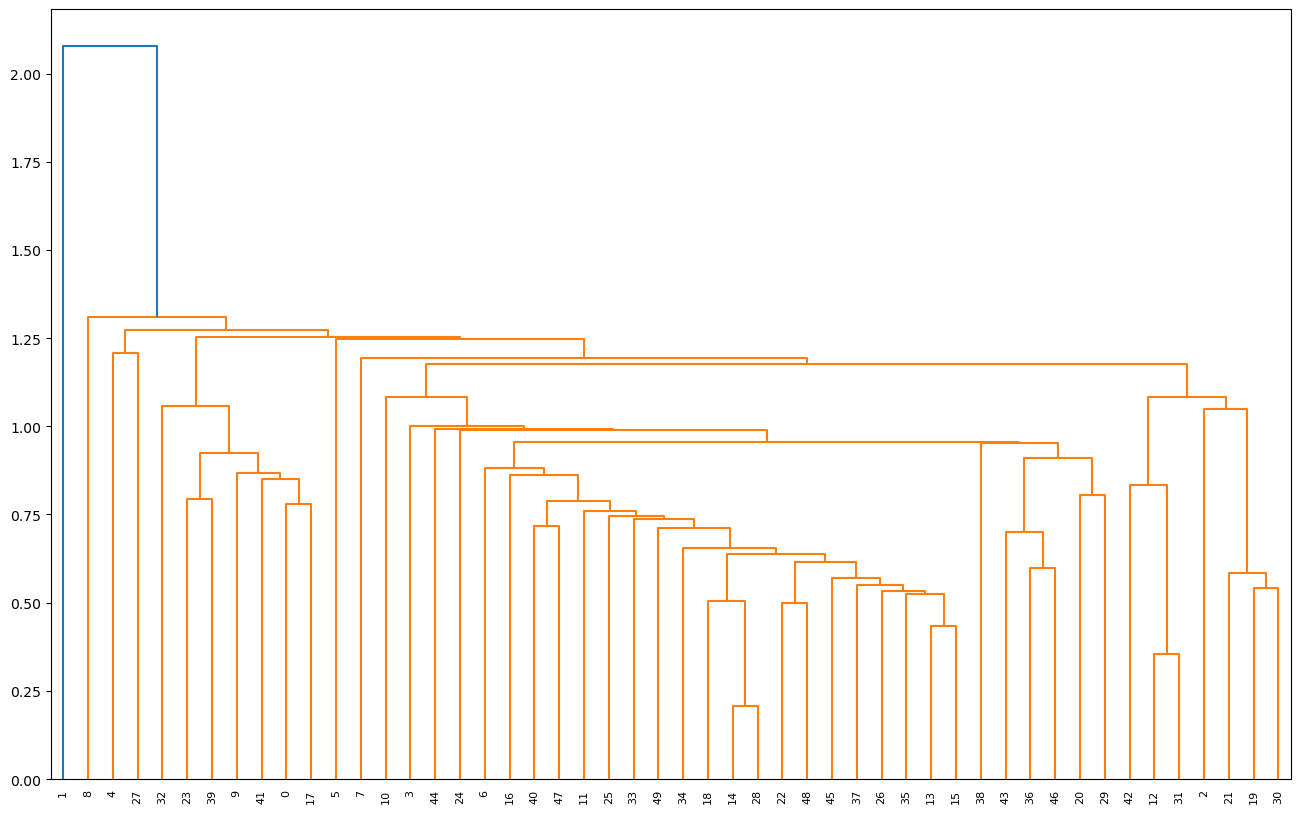

In [65]:
plt.figure(figsize=(16,10))
dgrm=sch.dendrogram(sch.linkage(scaled_df,method="single",metric="euclidean"))

In [66]:
hc=hc=AgglomerativeClustering(n_clusters=2,linkage="single")

In [67]:
hc

AgglomerativeClustering(linkage='single')

In [68]:
y_hc=hc.fit_predict(scaled_df)
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
aggc=pd.DataFrame({"Clusters":y_hc})

In [70]:
aggc

,Clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [72]:
agg_data=crime_data.copy()

In [73]:
agg_data['Clusters']=aggc
agg_data

,Country,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [74]:
cluster_0=agg_data[agg_data["Clusters"]==0]

In [75]:
cluster_0

,Country,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
10,Hawaii,5.3,46,83,20.2,0


In [76]:
cluster_1=agg_data[agg_data["Clusters"]==1]

In [77]:
cluster_1

,Country,Murder,Assault,UrbanPop,Rape,Clusters
1,Alaska,10.0,263,48,44.5,1


## K-Means Clustring

In [81]:
k_range=range(1,10)
sse=[]
for k in k_range:
    kc=KMeans(n_clusters=k)
    kc.fit(scaled_df)
    sse.append(kc.inertia_)

In [82]:
sse

[200.00000000000003,
 104.96163315756871,
 80.08886132199622,
 57.55425863091104,
 49.99384281326748,
 43.84066880397914,
 40.73865816375876,
 36.2522279824326,
 33.36237404530084]

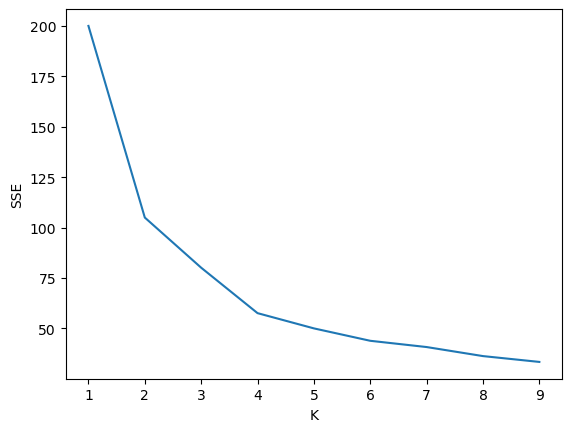

In [83]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_range,sse)
plt.show()

In [84]:
n_c=KMeans(n_clusters=2)
k_c=n_c.fit_predict(scaled_df)

In [85]:
k_c

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [86]:
KM_C=pd.DataFrame({"Clusters":k_c})
KM_C.head()


,Clusters
0,0
1,0
2,0
3,1
4,0


In [88]:
KM_DATA=crime_data.copy()

In [89]:
KM_DATA['Clusters']=KM_C

In [90]:
KM_DATA

,Country,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [91]:
km_cluster_0=KM_DATA[KM_DATA['Clusters']==0]

In [92]:
km_cluster_0

,Country,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0


In [93]:
km_cluster_1=KM_DATA[KM_DATA['Clusters']==1]

In [94]:
km_cluster_1

,Country,Murder,Assault,UrbanPop,Rape,Clusters
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1


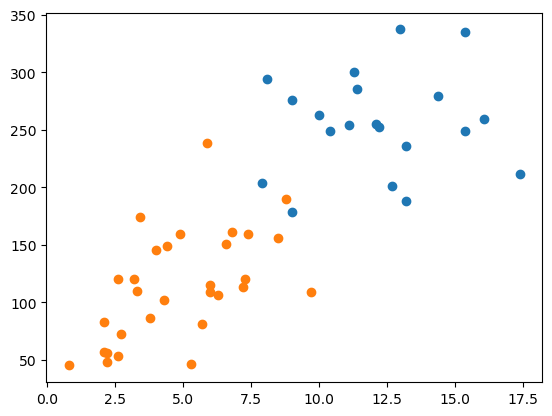

In [95]:
plt.scatter('Murder','Assault',data=km_cluster_0)
plt.scatter('Murder','Assault',data=km_cluster_1)

## DBSCAN

In [96]:
db_c=DBSCAN(eps=0.7,min_samples=3)
DB=db_c.fit_predict(scaled_df)
DB

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1, -1,  0, -1,  0, -1,  1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1],
      dtype=int64)

In [97]:
cluster=pd.DataFrame(DB)
cluster.head()

,0
0,-1
1,-1
2,-1
3,-1
4,-1


In [99]:
DB_DATA=crime_data.copy()

In [100]:
DB_DATA['Clusters']=cluster

In [101]:
DB_DATA

,Country,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [102]:
DB_DATA['Clusters'].value_counts()

Clusters
-1    35
 0    12
 1     3
Name: count, dtype: int64

In [103]:
cluster_n1=DB_DATA[DB_DATA.Clusters==-1]

In [104]:
cluster_n1

,Country,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [105]:
cluster_0=DB_DATA[DB_DATA.Clusters==0]

In [106]:
cluster_0

,Country,Murder,Assault,UrbanPop,Rape,Clusters
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
37,Pennsylvania,6.3,106,72,14.9,0


In [107]:
cluster_1=DB_DATA[DB_DATA.Clusters==1]

In [108]:
cluster_1

,Country,Murder,Assault,UrbanPop,Rape,Clusters
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1


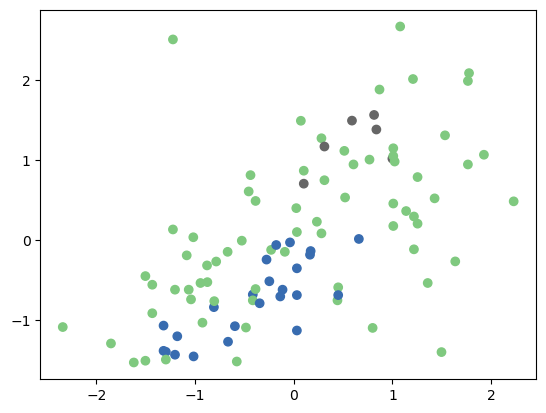

In [109]:
plt.scatter(scaled_df["Murder"],scaled_df["Assault"],c=DB,cmap=plt.cm.Accent)
plt.scatter(scaled_df["UrbanPop"],scaled_df["Rape"],c=DB,cmap=plt.cm.Accent)
plt.show()